In [ ]:
!pip install -q geopandas
!pip install -q contextily

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.9/20.9 MB 62.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 KB 6.5 MB/s eta 0:00:00


In [ ]:
# Bibliotecas
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
import contextily as ctx
from shapely.geometry import Polygon, LineString, Point

In [ ]:
# Função para visualização
def vis(gdf):
  fig, ax = plt.subplots(figsize=(15,10))
  gdf.plot(color="red",ax=ax, alpha=0.7)
  return ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik, crs=gdf.crs, )

In [ ]:
# Função para pontos regulares
def regular_points_and_save(file_path, spacing, output_file_path):
  gdf = gpd.read_file(file_path)
  x_min, y_min, x_max, y_max = gdf.total_bounds
  x_coords = np.arange(x_min, x_max, spacing)
  y_coords = np.arange(y_min, y_max, spacing)
  gdf_points = gpd.GeoDataFrame(geometry=[Point(x, y) for x in x_coords for y in y_coords])
  gdf_points.crs = gdf.crs
  gdf_points.to_file(output_file_path, driver='ESRI Shapefile')

In [ ]:
regular_points_and_save('/content/DF.geojson', 10000, 'pts.shp')

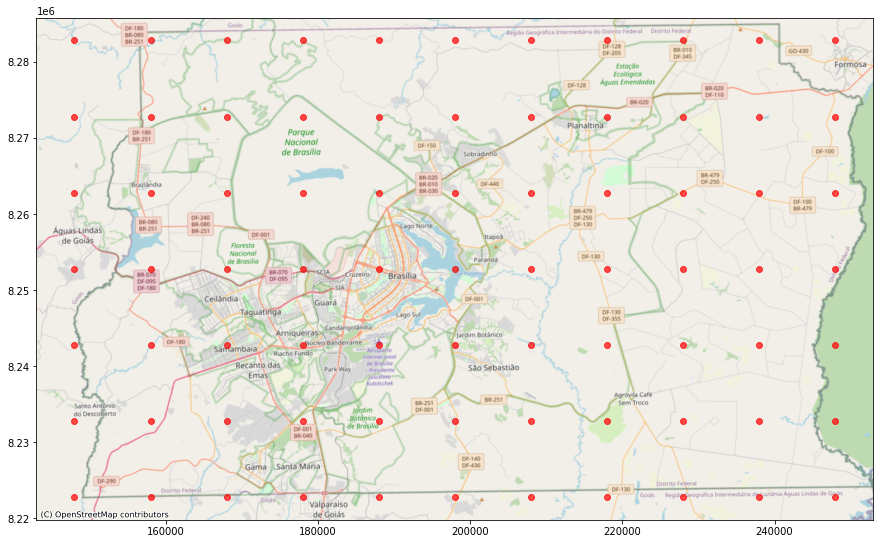

In [ ]:
gdf = gpd.read_file('/content/pts.shp')
vis(gdf)